### Imports and functions

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt 


# from src.LE_LoadAndMerge import *
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from copy import deepcopy
from src.multi_model_large_ensemble import MultiModelLargeEnsemble
import matplotlib
matplotlib.rc_file_defaults()
import string

In [3]:
models = ['MIROC6', 'cesm_lens', 'CanESM5', 'MPI-ESM1-2-LR','EC-Earth3']

In [105]:

regions_dict = {
    'Seattle': {'lat': 47.6, 'lon': 237.7},
    #'Sydney':  {'lat': -33.8, 'lon': 151.2},
    'Lagos':  {'lat': 6.5, 'lon': 3.4},
    'Montreal': {'lat': 45.5, 'lon': 286.2},
}

regions = [region for region in regions_dict]
lats = [values['lat'] for values in regions_dict.values()]
lons = [values['lon'] for values in regions_dict.values()]
region_dim = xr.DataArray(regions, coords={'region': regions})

variable_dim = xr.DataArray(['pr', 'tasmax'], coords={'variable': ['pr', 'tasmax']}, name='variable')


# Download data

## Implicit post-p

In [5]:
# load global data 
tasmax_mmle = MultiModelLargeEnsemble(models,'tasmax', 'day', 
                               lat=slice(None, None), lon=slice(None, None), 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')
tasmax_mmle.compute_x(x_type='quantile_return', load=True, name=f'tasmax_default_quantile_return_10yr_1995_2014')

Loading: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/tasmax_default_quantile_return_10yr_1995_2014/MIROC6.zarr
Loading: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/tasmax_default_quantile_return_10yr_1995_2014/cesm_lens.zarr
Loading: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/tasmax_default_quantile_return_10yr_1995_2014/CanESM5.zarr
Loading: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/tasmax_default_quantile_return_10yr_1995_2014/MPI-ESM1-2-LR.zarr
Loading: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/tasmax_default_quantile_return_10yr_1995_2014/EC-Earth3.zarr


In [6]:
tasmax_mmle.compute_LE()

In [7]:
# load global data
pr_mmle = MultiModelLargeEnsemble(models, 'pr', 'day', 
                               lat=slice(None, None), lon=slice(None, None), 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')
pr_mmle.compute_x(x_type='quantile_return', load=True, name=f'pr_default_quantile_return_10yr_1995_2014')

Loading: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/pr_default_quantile_return_10yr_1995_2014/MIROC6.zarr
Loading: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/pr_default_quantile_return_10yr_1995_2014/cesm_lens.zarr
Loading: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/pr_default_quantile_return_10yr_1995_2014/CanESM5.zarr
Loading: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/pr_default_quantile_return_10yr_1995_2014/MPI-ESM1-2-LR.zarr
Loading: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/pr_default_quantile_return_10yr_1995_2014/EC-Earth3.zarr


In [8]:
pr_mmle.compute_LE()

In [95]:
implicit = xr.concat([ds.sel(
    lat=xr.DataArray(lats, coords={'region': region_dim}), 
    lon=xr.DataArray(lons, coords={'region': region_dim}), 
    method='nearest'
) for ds in [pr_mmle.results, tasmax_mmle.results]], dim = variable_dim).drop(('q_values', 'lat', 'lon')) 

## No post-p

In [10]:
region = 'Seattle' 
Seattle_pr_raw = MultiModelLargeEnsemble(models=models, variable='pr', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')
Seattle_pr_raw.compute_x(x_type='quantile_return_raw', hist_slice = slice('1995', '2014'))

Seattle_tasmax_raw = MultiModelLargeEnsemble(models=models, variable='tasmax', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')
Seattle_tasmax_raw.compute_x(x_type='quantile_return_raw', hist_slice = slice('1995', '2014'))

100%|██████████| 1/1 [00:03<00:00,  3.38s/it]

4.8880157470703125
0


4.905048370361328
1


4.919895172119141
2




100%|██████████| 1/1 [00:00<00:00,  1.11it/s]




4.9147491455078125
3


4.944892883300781
4


100%|██████████| 1/1 [00:03<00:00,  3.16s/it]

5.061317443847656
0


5.029422760009766
1


5.032066345214844
2


5.028022766113281
3


5.026878356933594
4


In [11]:
Seattle_pr_raw.compute_LE()
Seattle_tasmax_raw.compute_LE()

In [18]:
region = 'Montreal' 
Montreal_pr_raw = MultiModelLargeEnsemble(models=models, variable='pr', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')
Montreal_pr_raw.compute_x(x_type='quantile_return_raw', hist_slice = slice('1995', '2014'))

Montreal_tasmax_raw = MultiModelLargeEnsemble(models=models, variable='tasmax', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')
Montreal_tasmax_raw.compute_x(x_type='quantile_return_raw', hist_slice = slice('1995', '2014'))

5.376796722412109
0


5.370491027832031
1


5.370208740234375
2


5.366878509521484
3


5.368316650390625
4


100%|██████████| 1/1 [00:02<00:00,  2.70s/it]

5.252632141113281
0


5.251808166503906
1


5.245243072509766
2




100%|██████████| 1/1 [00:00<00:00,  1.05it/s]




5.247333526611328
3


5.253223419189453
4


In [19]:
Montreal_pr_raw.compute_LE()
Montreal_tasmax_raw.compute_LE()

In [20]:
region = 'Lagos' 
Lagos_pr_raw = MultiModelLargeEnsemble(models=models, variable='pr', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')
Lagos_pr_raw.compute_x(x_type='quantile_return_raw', hist_slice = slice('1995', '2014'))

Lagos_tasmax_raw = MultiModelLargeEnsemble(models=models, variable='tasmax', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')
Lagos_tasmax_raw.compute_x(x_type='quantile_return_raw', hist_slice = slice('1995', '2014'))

100%|██████████| 1/1 [00:03<00:00,  3.24s/it]

5.351757049560547
0


5.346549987792969
1


5.322284698486328
2




100%|██████████| 1/1 [00:00<00:00,  1.24it/s]




5.323787689208984
3


5.327568054199219
4


100%|██████████| 1/1 [00:02<00:00,  2.81s/it]

5.354900360107422
0


5.342418670654297
1


5.328594207763672
2




100%|██████████| 1/1 [00:00<00:00,  1.31it/s]




5.3261566162109375
3


5.3251190185546875
4


In [30]:
Lagos_pr_raw.compute_LE()
Lagos_tasmax_raw.compute_LE()

In [63]:
tasmax_raw = xr.concat([Seattle_tasmax_raw.results, Lagos_tasmax_raw.results, Montreal_tasmax_raw.results], dim=region_dim)
pr_raw = xr.concat([Seattle_pr_raw.results, Lagos_pr_raw.results, Montreal_pr_raw.results], dim=region_dim)

In [98]:
raw = xr.concat([ds.sel(
    lat=xr.DataArray(lats, coords={'region': region_dim}), 
    lon=xr.DataArray(lons, coords={'region': region_dim}), 
    method='nearest'
) for ds in [pr_raw, tasmax_raw]], dim = variable_dim).drop(('q_values', 'lat', 'lon')) 

## QDM implicit

In [78]:
region = 'Seattle' 
Seattle_pr_Qdm_implicit = MultiModelLargeEnsemble(models=models, variable='pr', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')
Seattle_pr_Qdm_implicit.compute_x(x_type='quantile_return', hist_slice = slice('1995', '2014'))

Seattle_tasmax_Qdm_implicit = MultiModelLargeEnsemble(models=models, variable='tasmax', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')
Seattle_tasmax_Qdm_implicit.compute_x(x_type='quantile_return', hist_slice = slice('1995', '2014'))

  0%|          | 0/1 [00:00<?, ?it/s]

5.5732574462890625
0


  0%|          | 0/1 [00:00<?, ?it/s]

5.575756072998047
1


100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

5.5662689208984375
2


100%|██████████| 1/1 [00:00<00:00,  2.59it/s]


5.571155548095703
3


5.5596923828125
4


5.573635101318359
0


5.578392028808594
1





100%|██████████| 1/1 [00:00<00:00,  1.60it/s]





5.563987731933594
2





100%|██████████| 1/1 [00:00<00:00,  2.40it/s]





5.5764007568359375
3


5.580318450927734
4


In [79]:
Seattle_pr_Qdm_implicit.compute_LE()
Seattle_tasmax_Qdm_implicit.compute_LE()

In [80]:
region = 'Montreal' 
Montreal_pr_Qdm_implicit = MultiModelLargeEnsemble(models=models, variable='pr', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')
Montreal_pr_Qdm_implicit.compute_x(x_type='quantile_return', hist_slice = slice('1995', '2014'))

Montreal_tasmax_Qdm_implicit = MultiModelLargeEnsemble(models=models, variable='tasmax', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')
Montreal_tasmax_Qdm_implicit.compute_x(x_type='quantile_return', hist_slice = slice('1995', '2014'))

5.569118499755859
0


5.566738128662109
1


5.5660858154296875
2


5.568824768066406
3


5.582054138183594
4




















100%|██████████| 1/1 [00:00<00:00,  1.70it/s]











5.582984924316406
0











100%|██████████| 1/1 [00:00<00:00,  2.34it/s]











5.5843658447265625
1


5.577945709228516
2












100%|██████████| 1/1 [00:00<00:00,  3.49it/s]












5.581974029541016
3


5.585212707519531
4


In [81]:
Montreal_pr_Qdm_implicit.compute_LE()
Montreal_tasmax_Qdm_implicit.compute_LE()

In [82]:
region = 'Lagos' 
Lagos_pr_Qdm_implicit = MultiModelLargeEnsemble(models=models, variable='pr', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')
Lagos_pr_Qdm_implicit.compute_x(x_type='quantile_return_raw', hist_slice = slice('1995', '2014'))

Lagos_tasmax_Qdm_implicit = MultiModelLargeEnsemble(models=models, variable='tasmax', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')
Lagos_tasmax_Qdm_implicit.compute_x(x_type='quantile_return', hist_slice = slice('1995', '2014'))

5.574901580810547
0


5.577068328857422
1


5.578098297119141
2


5.570587158203125
3


5.572135925292969
4


5.584629058837891
0


5.581050872802734
1


5.576259613037109
2





















100%|██████████| 1/1 [00:00<00:00,  3.30it/s]




















5.5947418212890625
3


5.587505340576172
4


In [83]:
Lagos_pr_Qdm_implicit.compute_LE()
Lagos_tasmax_Qdm_implicit.compute_LE()


In [99]:
tasmax_qdm_implicit = xr.concat([Seattle_tasmax_Qdm_implicit.results, Lagos_tasmax_Qdm_implicit.results, Montreal_tasmax_Qdm_implicit.results], dim=region_dim)
pr_qdm_implicit = xr.concat([Seattle_pr_Qdm_implicit.results, Lagos_pr_Qdm_implicit.results, Montreal_pr_Qdm_implicit.results], dim=region_dim)

qdm_implicit = xr.concat([ds.sel(
    lat=xr.DataArray(lats, coords={'region': region_dim}), 
    lon=xr.DataArray(lons, coords={'region': region_dim}), 
    method='nearest'
) for ds in [pr_qdm_implicit, tasmax_qdm_implicit]], dim = variable_dim).drop(('q_values', 'lat', 'lon')) 

## QDM raw

In [ ]:
region = 'Seattle' 
Seattle_pr_Qdm = MultiModelLargeEnsemble(models=models, variable='pr', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')
Seattle_pr_Qdm.compute_x(x_type='quantile_return_raw', hist_slice = slice('1995', '2014'))

Seattle_tasmax_Qdm = MultiModelLargeEnsemble(models=models, variable='tasmax', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')
Seattle_tasmax_Qdm.compute_x(x_type='quantile_return_raw', hist_slice = slice('1995', '2014'))









100%|██████████| 1/1 [00:00<00:00,  1.63it/s]






5.45233154296875
0






100%|██████████| 1/1 [00:00<00:00,  1.69it/s]






5.445945739746094
1


5.458080291748047
2







100%|██████████| 1/1 [00:00<00:00,  2.87it/s]







5.456027984619141
3


5.451892852783203
4


5.458003997802734
0


5.461544036865234
1


5.462947845458984
2


5.459285736083984
3


5.460060119628906
4


In [ ]:
Seattle_pr_Qdm.compute_LE()
Seattle_tasmax_Qdm.compute_LE()

In [ ]:
region = 'Montreal' 
Montreal_pr_Qdm = MultiModelLargeEnsemble(models=models, variable='pr', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')
Montreal_pr_Qdm.compute_x(x_type='quantile_return_raw', hist_slice = slice('1995', '2014'))

Montreal_tasmax_Qdm = MultiModelLargeEnsemble(models=models, variable='tasmax', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')
Montreal_tasmax_Qdm.compute_x(x_type='quantile_return_raw', hist_slice = slice('1995', '2014'))























100%|██████████| 1/1 [00:00<00:00,  2.06it/s]













5.470970153808594
0













100%|██████████| 1/1 [00:00<00:00,  2.41it/s]













5.472465515136719
1


5.471946716308594
2














100%|██████████| 1/1 [00:00<00:00,  3.65it/s]














5.4674530029296875
3


5.46502685546875
4


5.4723663330078125
0


5.4789276123046875
1

































100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

5.4800262451171875
2


5.473117828369141
3


5.477291107177734
4


In [ ]:
Montreal_pr_Qdm.compute_LE()
Montreal_tasmax_Qdm.compute_LE()

In [ ]:
region = 'Lagos' 
Lagos_pr_Qdm = MultiModelLargeEnsemble(models=models, variable='pr', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')
Lagos_pr_Qdm.compute_x(x_type='quantile_return_raw', hist_slice = slice('1995', '2014'))

Lagos_tasmax_Qdm = MultiModelLargeEnsemble(models=models, variable='tasmax', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')
Lagos_tasmax_Qdm.compute_x(x_type='quantile_return_raw', hist_slice = slice('1995', '2014'))



































100%|██████████| 1/1 [00:00<00:00,  1.82it/s]



















5.457050323486328
0



















100%|██████████| 1/1 [00:00<00:00,  2.28it/s]



















5.4516143798828125
1


5.452430725097656
2




















100%|██████████| 1/1 [00:00<00:00,  3.24it/s]




















5.448616027832031
3


5.45977783203125
4
5.4626312255859375
0
5.4589996337890625
1
5.4599761962890625
2
5.4640960693359375
3
5.465839385986328
4


In [ ]:
Lagos_pr_Qdm.compute_LE()
Lagos_tasmax_Qdm.compute_LE()


In [100]:
tasmax_qdm = xr.concat([Seattle_tasmax_Qdm.results, Lagos_tasmax_Qdm.results, Montreal_tasmax_Qdm.results], dim=region_dim)
pr_qdm = xr.concat([Seattle_pr_Qdm.results, Lagos_pr_Qdm.results, Montreal_pr_Qdm.results], dim=region_dim)

qdm = xr.concat([ds.sel(
    lat=xr.DataArray(lats, coords={'region': region_dim}), 
    lon=xr.DataArray(lons, coords={'region': region_dim}), 
    method='nearest'
) for ds in [pr_qdm, tasmax_qdm]], dim = variable_dim).drop(('q_values', 'lat', 'lon')) 

# Plot

In [101]:
qdm['MTratio'] = (qdm.M_LE/(qdm.M_LE+qdm.Ibar_LE))*100
raw['MTratio'] = (raw.M_LE/(raw.M_LE+raw.Ibar_LE))*100
implicit['MTratio'] = (implicit.M_LE/(implicit.M_LE+implicit.Ibar_LE))*100
qdm_implicit['MTratio'] = (qdm_implicit.M_LE/(qdm_implicit.M_LE+qdm_implicit.Ibar_LE))*100

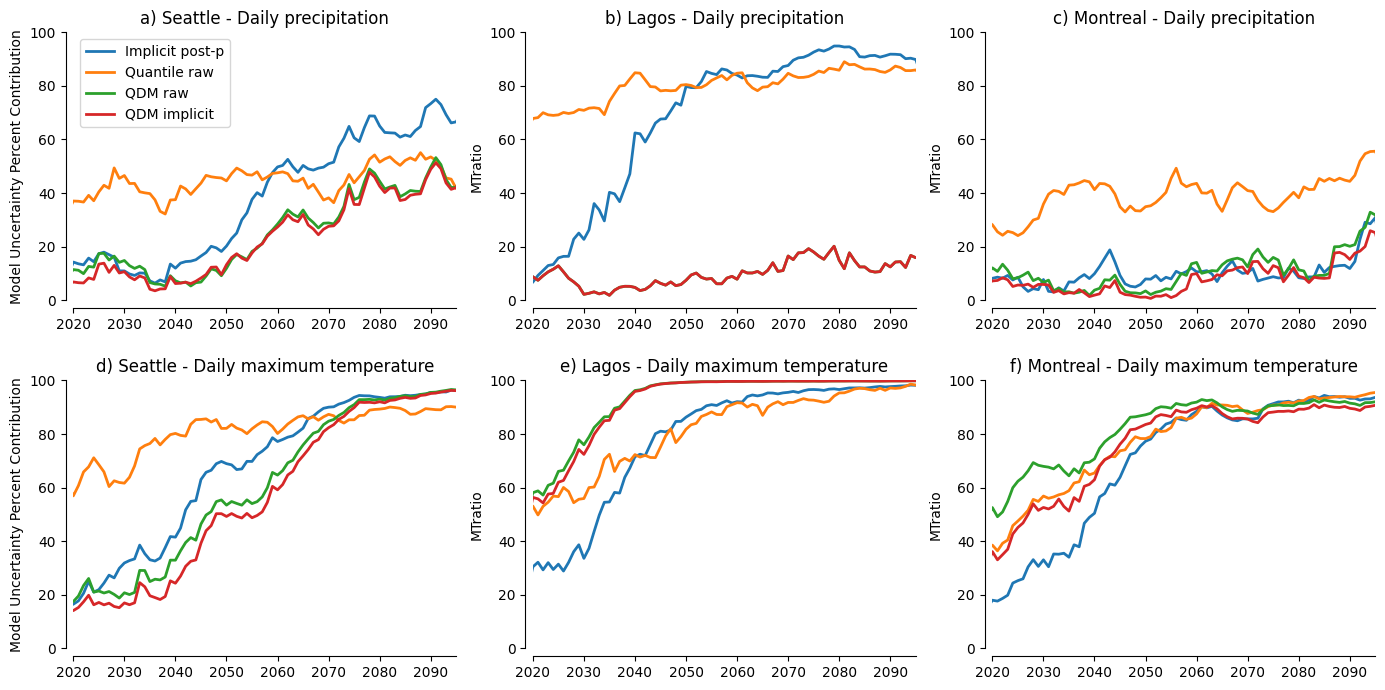

In [102]:
var_dict = {'tasmax': 'Daily maximum temperature', 'pr': 'Daily precipitation'}
fig, axs = plt.subplots(nrows=2,ncols=3, constrained_layout=True,figsize=(14,7))

count = 0
for iv, v in enumerate(implicit['variable'].values):
    for ir, r in enumerate(implicit.region.values):
        ax = axs[iv, ir]

        implicit.sel(variable=v, region=r).MTratio.plot(ax=ax, lw=2,label='Implicit post-p')
        raw.sel(variable=v, region=r).MTratio.plot(ax=ax, lw=2,label='Quantile raw')
        qdm.sel(variable=v, region=r).MTratio.plot(ax=ax, lw=2,label='QDM raw')
        qdm_implicit.sel(variable=v, region=r).MTratio.plot(ax=ax, lw=2,label='QDM implicit')
        
        ax.set_xlim(np.datetime64('2020'), np.datetime64('2095'))
        ax.set_ylim(bottom=0, top=100)
        ax.set_title(f'{string.ascii_lowercase[count]}) {r} - {var_dict[v]}')
        ax.set_xlabel('')
        ax.spines.right.set_visible(False)
        ax.spines.top.set_visible(False)
        ax.spines["bottom"].set_position(("axes", -0.03)) 
        ax.spines["left"].set_position(("axes", -0.02))
#         ax.set_facecolor('0.95')
        count += 1
axs[0, 0].legend()
for ax in axs[:, 0]:
    ax.set_ylabel('Model Uncertainty Percent Contribution')
    
plt.subplots_adjust(left=0.06, right=0.99, bottom=0.07, top=0.95, wspace=0.20, hspace=0.30)  # all parameters MUST be specified for reproducibility!
# fig.patch.set_facecolor('0.9')   # Hack to get grayscale. To see actual figure size.
# fig.savefig('./plots/sensitivity_extreme_defs.png', dpi=200)


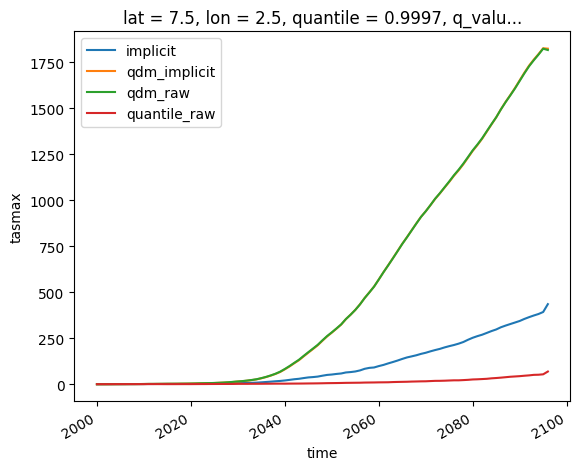

In [138]:
tasmax_mmle.x.sel(lat = regions_dict['Lagos']['lat'], lon = regions_dict['Lagos']['lon'], method='nearest').mean('model').mean('member_id').plot(label = 'implicit')
Lagos_tasmax_Qdm_implicit.x.mean('model').mean('member_id').plot(label='qdm_implicit')
Lagos_tasmax_Qdm.x.mean('model').mean('member_id').plot(label='qdm_raw')
Lagos_tasmax_raw.x.mean('model').mean('member_id').plot(label='quantile_raw')
plt.legend()

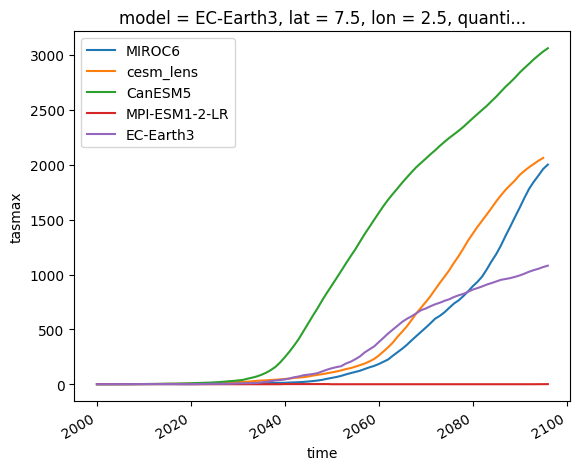

In [148]:
for model in pr_mmle.hist_dsets:
    Lagos_tasmax_Qdm_implicit.x.sel(model=model).mean('member_id').plot(label = model)
plt.legend()


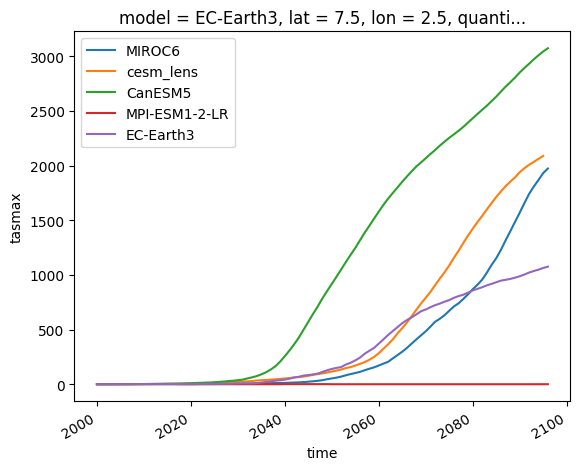

In [151]:
for model in pr_mmle.hist_dsets:
    Lagos_tasmax_Qdm.x.sel(model=model).mean('member_id').plot(label = model)
plt.legend()

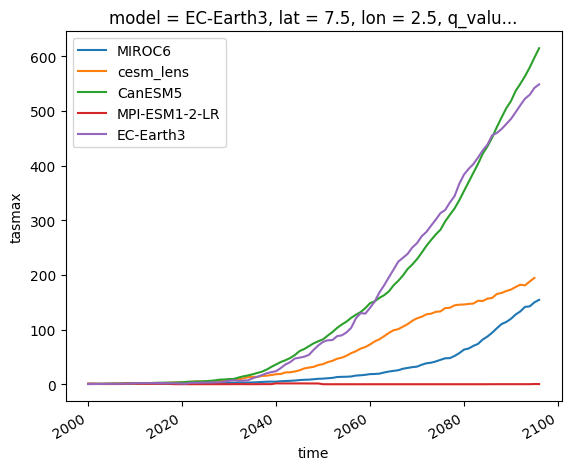

In [149]:
for model in pr_mmle.hist_dsets:
    tasmax_mmle.x.sel(lat = regions_dict['Lagos']['lat'], lon = regions_dict['Lagos']['lon'], method='nearest').sel(model=model).mean('member_id').plot(label = model)
plt.legend()

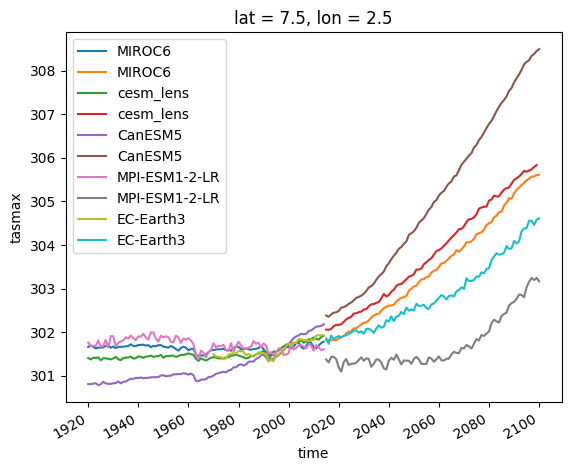

In [145]:
for model in pr_mmle.hist_dsets:
    Lagos_tasmax_Qdm_implicit.hist_dsets[model].mean('member_id').resample(time='AS').mean().plot(label = model)
    Lagos_tasmax_Qdm_implicit.future_dsets[model].mean('member_id').resample(time='AS').mean().plot(label = model)

    plt.legend()

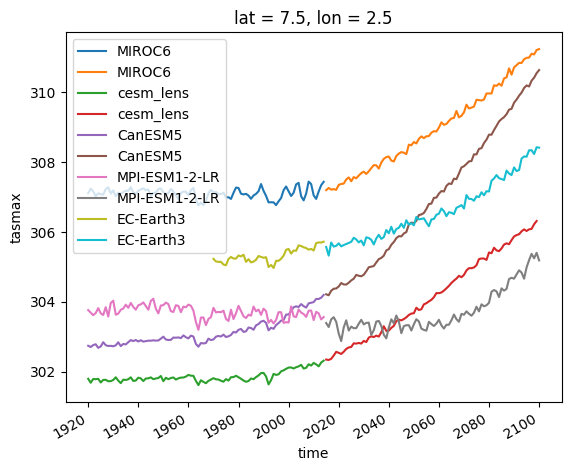

In [144]:
for model in pr_mmle.hist_dsets:
    tasmax_mmle.hist_dsets[model].sel(lat = regions_dict['Lagos']['lat'], lon = regions_dict['Lagos']['lon'], method='nearest').mean('member_id').resample(time='AS').mean().plot(label = model)
    tasmax_mmle.future_dsets[model].sel(lat = regions_dict['Lagos']['lat'], lon = regions_dict['Lagos']['lon'], method='nearest').mean('member_id').resample(time='AS').mean().plot(label = model)

    plt.legend()

In [ ]:
tasmax_mmle.hist_dsets['MIROC6'].sel(lat = regions_dict['Lagos']['lat'], lon = regions_dict['Lagos']['lon'], method='nearest').mean('member_id').resample(time='AS').mean().plot(label = 'implicit')
Lagos_tasmax_Qdm_implicit.hist_dsets['MIROC6'].mean('member_id').resample(time='AS').mean().plot(label = 'qdm_implicit')
Lagos_tasmax_Qdm.hist_dsets['MIROC6'].mean('member_id').resample(time='AS').mean().plot(label = 'qdm_raw', linestyle = 'dashed')
Lagos_tasmax_raw.hist_dsets['MIROC6'].mean('member_id').resample(time='AS').mean().plot(label = 'quantile_raw', linestyle = 'dashed')

tasmax_mmle.future_dsets['MIROC6'].sel(lat = regions_dict['Lagos']['lat'], lon = regions_dict['Lagos']['lon'], method='nearest').mean('member_id').resample(time='AS').mean().plot(label = 'implicit')
Lagos_tasmax_Qdm_implicit.future_dsets['MIROC6'].mean('member_id').resample(time='AS').mean().plot(label = 'qdm_implicit')
Lagos_tasmax_Qdm.future_dsets['MIROC6'].mean('member_id').resample(time='AS').mean().plot(label = 'qdm_raw', linestyle = 'dashed')
Lagos_tasmax_raw.future_dsets['MIROC6'].mean('member_id').resample(time='AS').mean().plot(label = 'quantile_raw', linestyle = 'dashed')

plt.legend()